In [6]:

#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [11]:

#TRAIN AND TEST DATASET ADDRESS
DATASET="E:/blood_cell_classification/kaggle_dataset/dataset2-master/dataset2-master/images/TRAIN/"
TEST_DATASET="E:/blood_cell_classification/kaggle_dataset/dataset2-master/dataset2-master/images/TEST/"

#Categroized images
#4 types of subcells
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

(240, 320, 3)


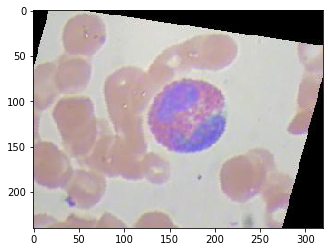

(240, 320, 3)


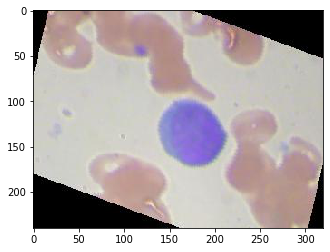

(240, 320, 3)


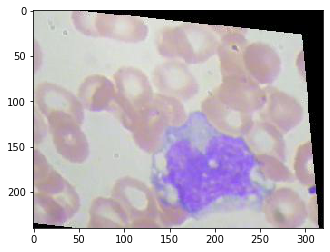

(240, 320, 3)


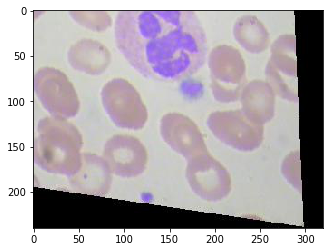

In [16]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

(240, 320, 3)


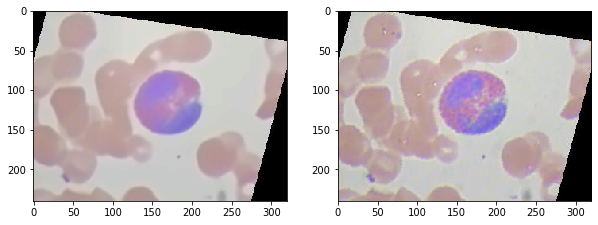

(240, 320, 3)


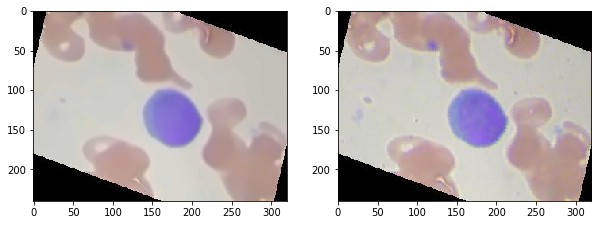

(240, 320, 3)


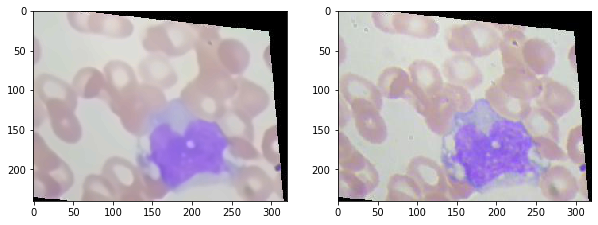

(240, 320, 3)


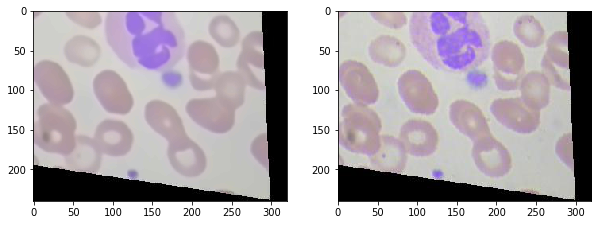

In [14]:
#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            #image convert to smaller pixels 60*60
            print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

In [17]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])

In [18]:

#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])

In [19]:

#print total data in train and test
print(len(train_data))
print(len(test_data))

9957
2487


In [20]:
#shuffle the dataset fo good result

import random

random.shuffle(train_data)
random.shuffle(test_data)

In [21]:

#check the data
for lbl in train_data[:10]:
    print(lbl[1])

2
3
2
1
2
0
0
3
1
1


In [22]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(9957, 9957)

In [23]:

#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2487, 2487)

In [24]:

#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0

(9957, 60, 60, 3)

In [25]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0

(2487, 60, 60, 3)

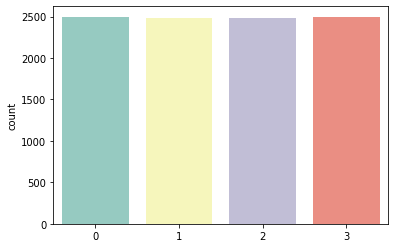

In [26]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data

In [27]:
#convert label into the one hot encode
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.


array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [28]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [29]:
#Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [32]:
model=Sequential()
#conv layer 1
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))
#conv layer 2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))
#conv layer 3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))
#one d array
model.add(Flatten())
#fully connected layer
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
#output layer          
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       7

In [33]:

#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
#lets split the 20% train dataset for validation 
hist=model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Train on 7965 samples, validate on 1992 samples
Epoch 1/50
7965/7965 [==============================] - 22s 3ms/sample - loss: 1.3875 - accuracy: 0.2525 - val_loss: 1.3851 - val_accuracy: 0.2585
Epoch 2/50
7965/7965 [==============================] - 21s 3ms/sample - loss: 1.3825 - accuracy: 0.2702 - val_loss: 1.3860 - val_accuracy: 0.2495
Epoch 3/50
7965/7965 [==============================] - 21s 3ms/sample - loss: 1.3694 - accuracy: 0.3091 - val_loss: 1.3102 - val_accuracy: 0.3539
Epoch 4/50
7965/7965 [==============================] - 21s 3ms/sample - loss: 1.2401 - accuracy: 0.4113 - val_loss: 1.0994 - val_accuracy: 0.5005
Epoch 5/50
7965/7965 [==============================] - 20s 3ms/sample - loss: 1.1070 - accuracy: 0.4863 - val_loss: 1.1303 - val_accuracy: 0.4448
Epoch 6/50
7965/7965 [==============================] - 24s 3ms/sample - loss: 0.9833 - accuracy: 0.5468 - val_loss: 0.8543 - val_accuracy: 0.6039
Epoch 7/50
7965/7965 [==============================] - 27s 3ms/sample

In [35]:
#model evaluation
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

2487/2487 [==============================] - 2s 630us/sample - loss: 0.9394 - accuracy: 0.7965


(0.9394010372031487, 0.796542)

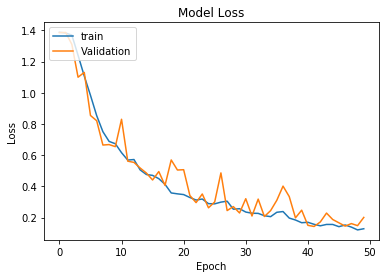

In [36]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

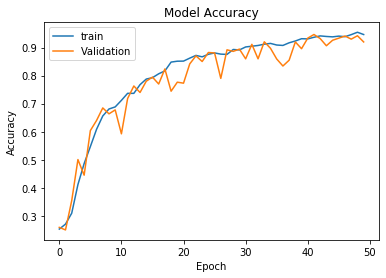

In [39]:
#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [40]:

#model prediction

y_pred=model.predict_classes(test_X)
y_pred

array([3, 2, 2, ..., 0, 3, 3], dtype=int64)

In [41]:
for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))

Actual=2, Predicted=3
Actual=2, Predicted=2
Actual=2, Predicted=2
Actual=0, Predicted=0
Actual=2, Predicted=3
Actual=0, Predicted=0
Actual=0, Predicted=3
Actual=2, Predicted=3
Actual=0, Predicted=0
Actual=0, Predicted=0


In [42]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)

0.7965420184961801

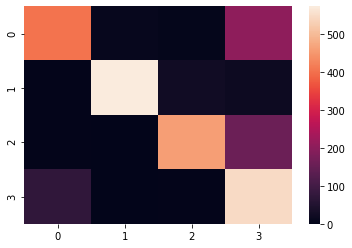

In [43]:
sns.heatmap(confusion_matrix(test_y,y_pred))
